<a href="https://colab.research.google.com/github/shazzad-hasan/ethereum-addresses-space-clustering/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ethereum-address-space-clustering/data/address_data.csv").drop(columns=['Unnamed: 0'])
df.head()

,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance
0,0xd26a4d3ce34eef62a5eacc1f07b6e4ed11d0d516,256,151,19.774926,0.077246,6.419212e+03,25.075046,77.681603,0.514448,1.893196e+04,...,11.097372,2.704566e+03,0,0,100093.900000,254570.169509,59336.572549,213155.856128,30,60.153426
1,0x5730d1ea8624b745dde30e57d7f6e8f83fcec98a,256,56,3651.334521,14.263025,1.607194e+06,6278.101788,2706.690819,48.333765,1.378033e+06,...,159.217107,8.106079e+04,0,0,639384.018182,857951.592990,156710.439216,341322.129482,24,81.758482
2,0x1efc1e054f14aa9ab69e71c8f181d4b8f4005735,256,104,14800.887683,57.815968,7.144330e+06,27907.538523,16843.009975,161.952019,7.774533e+06,...,990.765293,4.573254e+05,0,0,208644.184466,621665.577772,102012.976471,573323.712422,27,95.799344
3,0xfd3a935174aeb79b8d5d3935de1188e37427561f,768,892,23397.465171,30.465449,1.463310e+05,190.535165,27432.509324,30.753934,1.863646e+05,...,741.419171,5.036881e+03,3,116,69598.839506,880138.733789,33976.006519,129262.257907,11,40.338890
4,0xf27b5cf6d40531556f6e6eeb445a8c88c8f9815f,1024,9860,91026.755919,88.893316,5.362961e+07,52372.662163,92880.306328,9.419909,5.539882e+07,...,7144.638948,4.261448e+06,0,0,3014.540521,39706.386044,28969.567937,199625.182527,15,2625.511306


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35917 entries, 0 to 35916
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      35917 non-null  object 
 1   outgoing_txns                35917 non-null  int64  
 2   incoming_txns                35917 non-null  int64  
 3   total_eth_sent               35917 non-null  float64
 4   avg_eth_sent                 35917 non-null  float64
 5   total_usd_sent               35917 non-null  float64
 6   avg_usd_sent                 35917 non-null  float64
 7   total_eth_recd               35917 non-null  float64
 8   avg_eth_recd                 35917 non-null  float64
 9   total_usd_recd               35917 non-null  float64
 10  avg_usd_recd                 35917 non-null  float64
 11  active_months                35917 non-null  int64  
 12  monthly_outgoing_txns        35917 non-null  float64
 13  monthly_incoming

In [5]:
df_label_k = pd.read_csv("/content/drive/MyDrive/ethereum-address-space-clustering/data/address_labels_kaggle.csv")
df_label_k.head()

,Address,Name,Account Type,Contract Type,Entity,Label,Tags,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0x8ab7404063ec4dbcfd4598215992dc3f8ec853d7,Akropolis (AKRO),Smart Contract,Token,DeFi,Legit,DeFi,Token Contract,NaN,NaN,NaN,NaN
1,0x1c74cff0376fb4031cd7492cd6db2d66c3f2c6b9,bZx Protocol Token (BZRX),Smart Contract,Token,DeFi,Legit,Token Contract,bZx,DeFi,0x Ecosystem,Trading,Liquidity
2,0x06af07097c9eeb7fd685c692751d5c66db49c215,Chai (CHAI),Smart Contract,Token,DeFi,Legit,DeFi,Token Contract,Verified Contract,NaN,NaN,NaN
3,0xc00e94cb662c3520282e6f5717214004a7f26888,Compound (COMP),Smart Contract,Token,DeFi,Legit,DAO,Compound,Token Contract,NaN,NaN,NaN
4,0xb3319f5d18bc0d84dd1b4825dcde5d5f7266d407,Compound 0x (cZRX),Smart Contract,Token,DeFi,Legit,Token Contract,DeFi,Compound,0x Ecosystem,NaN,NaN


In [6]:
df_label_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19138 entries, 0 to 19137
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Address        19138 non-null  object
 1   Name           18968 non-null  object
 2   Account Type   19135 non-null  object
 3   Contract Type  3329 non-null   object
 4   Entity         1646 non-null   object
 5   Label          19138 non-null  object
 6   Tags           19135 non-null  object
 7   Unnamed: 7     4603 non-null   object
 8   Unnamed: 8     785 non-null    object
 9   Unnamed: 9     141 non-null    object
 10  Unnamed: 10    24 non-null     object
 11  Unnamed: 11    1 non-null      object
dtypes: object(12)
memory usage: 1.8+ MB


In [7]:
df_label_k = df_label_k[["Address", "Entity"]]
df_label_k.Entity.value_counts()

,count
Entity,
DeFi,1046
Exchange,249
ICO Wallets,161
Mining,108
Dex,81
Entity,1


In [8]:
df_label_k = df_label_k.loc[df_label_k["Entity"].isin(["Exchange", "Mining", "ICO Wallets", "DeFi", "Dex"])]
df_label_k.rename({"Address": "address"}, axis=1, inplace=True)

<ipython-input-8-35b7d440e88a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_k.rename({"Address": "address"}, axis=1, inplace=True)


In [9]:
df_label_g = pd.read_csv("/content/drive/MyDrive/ethereum-address-space-clustering/data/address_labels_bigquery.csv")
df_label_g.head()

,Unnamed: 0,label,category,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,cluster
0,0,Bgogo_1,Exchange,0x7a10ec7d68a048bdae36a70e93532d31423170fa,4634,42,55512.946966,11.979488,1.193449e+07,2575.419682,...,4.162975e+06,0,0,1.383690e+05,1.409740e+05,1.257425e+03,4.127817e+03,5,486.335359,101
1,1,Bgogo_2,Exchange,0xce1bf8e51f8b39e51c6184e059786d1c0eaf360f,36,5043,57900.000000,1608.333333,1.248853e+07,346903.638889,...,4.418291e+06,0,0,9.234072e+02,1.880744e+04,1.373183e+05,1.435795e+05,16,4361.036313,101
2,2,Rate3_Wallet2,ICO Wallets,0x841991ffe0dafd619bc517d82ee4700c37136140,7,5,5040.000000,720.000000,1.877741e+06,268248.742857,...,8.097912e+05,0,0,1.017963e+06,1.390813e+06,7.171660e+05,1.001970e+06,3,4644.727652,1
3,3,Bitmax_1,Exchange,0x03bdf69b1322d623836afbd27679a1c0afa067e9,1061,1081,3348.282085,3.155780,7.798949e+05,735.056486,...,2.748006e+05,0,0,9.625878e+03,6.593208e+04,9.759738e+03,5.313994e+04,13,3871.119197,100
4,4,Bitmax_2,Exchange,0x4b1a99467a284cc690e3237bc69105956816f762,3,1303,260.000000,86.666667,5.097040e+04,16990.133333,...,1.608649e+05,0,0,8.146992e+03,1.386719e+05,1.307516e+06,1.848834e+06,3,2698.982399,6


In [10]:
df_label_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   126 non-null    int64  
 1   label                        126 non-null    object 
 2   category                     126 non-null    object 
 3   address                      126 non-null    object 
 4   outgoing_txns                126 non-null    int64  
 5   incoming_txns                126 non-null    int64  
 6   total_eth_sent               126 non-null    float64
 7   avg_eth_sent                 126 non-null    float64
 8   total_usd_sent               126 non-null    float64
 9   avg_usd_sent                 126 non-null    float64
 10  total_eth_recd               126 non-null    float64
 11  avg_eth_recd                 126 non-null    float64
 12  total_usd_recd               126 non-null    float64
 13  avg_usd_recd        

In [11]:
df_label_g = df_label_g[["address", "category"]]
df_label_g.category.value_counts()

,count
category,
Exchange,53
ICO Wallets,29
Mining,14
Phish/Hack,9
Binance,5
Heist,4
Token Sale,3
Wallet App,2
Donate,2


In [12]:
df_label_g = df_label_g.loc[df_label_g["category"].isin(["Exchange", "Mining", "ICO Wallets", "DeFi", "Dex"])]
df_label_g.rename({"category": "Entity"}, axis=1, inplace=True)

In [13]:
df_label_combined = pd.concat([df_label_k, df_label_g])
df_label_combined = df_label_combined.drop_duplicates()
df_label_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1650 entries, 0 to 125
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  1650 non-null   object
 1   Entity   1650 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB


In [14]:
df_label_combined.Entity.value_counts()

,count
Entity,
DeFi,1046
Exchange,251
ICO Wallets,163
Mining,110
Dex,80


In [15]:
df_labeled = df.merge(df_label_combined, how="left", on="address")
df_labeled.head()

,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,Entity
0,0xd26a4d3ce34eef62a5eacc1f07b6e4ed11d0d516,256,151,19.774926,0.077246,6.419212e+03,25.075046,77.681603,0.514448,1.893196e+04,...,2.704566e+03,0,0,100093.900000,254570.169509,59336.572549,213155.856128,30,60.153426,NaN
1,0x5730d1ea8624b745dde30e57d7f6e8f83fcec98a,256,56,3651.334521,14.263025,1.607194e+06,6278.101788,2706.690819,48.333765,1.378033e+06,...,8.106079e+04,0,0,639384.018182,857951.592990,156710.439216,341322.129482,24,81.758482,NaN
2,0x1efc1e054f14aa9ab69e71c8f181d4b8f4005735,256,104,14800.887683,57.815968,7.144330e+06,27907.538523,16843.009975,161.952019,7.774533e+06,...,4.573254e+05,0,0,208644.184466,621665.577772,102012.976471,573323.712422,27,95.799344,NaN
3,0xfd3a935174aeb79b8d5d3935de1188e37427561f,768,892,23397.465171,30.465449,1.463310e+05,190.535165,27432.509324,30.753934,1.863646e+05,...,5.036881e+03,3,116,69598.839506,880138.733789,33976.006519,129262.257907,11,40.338890,NaN
4,0xf27b5cf6d40531556f6e6eeb445a8c88c8f9815f,1024,9860,91026.755919,88.893316,5.362961e+07,52372.662163,92880.306328,9.419909,5.539882e+07,...,4.261448e+06,0,0,3014.540521,39706.386044,28969.567937,199625.182527,15,2625.511306,NaN


In [16]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35917 entries, 0 to 35916
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      35917 non-null  object 
 1   outgoing_txns                35917 non-null  int64  
 2   incoming_txns                35917 non-null  int64  
 3   total_eth_sent               35917 non-null  float64
 4   avg_eth_sent                 35917 non-null  float64
 5   total_usd_sent               35917 non-null  float64
 6   avg_usd_sent                 35917 non-null  float64
 7   total_eth_recd               35917 non-null  float64
 8   avg_eth_recd                 35917 non-null  float64
 9   total_usd_recd               35917 non-null  float64
 10  avg_usd_recd                 35917 non-null  float64
 11  active_months                35917 non-null  int64  
 12  monthly_outgoing_txns        35917 non-null  float64
 13  monthly_incoming

In [17]:
df_labeled.Entity.value_counts()

,count
Entity,
Exchange,112
ICO Wallets,29
Mining,19
Dex,1


In [18]:
df_labeled.drop(df_labeled[df_labeled['Entity'] == 'Dex'].index, inplace=True)
df_labeled.Entity.value_counts()

,count
Entity,
Exchange,112
ICO Wallets,29
Mining,19


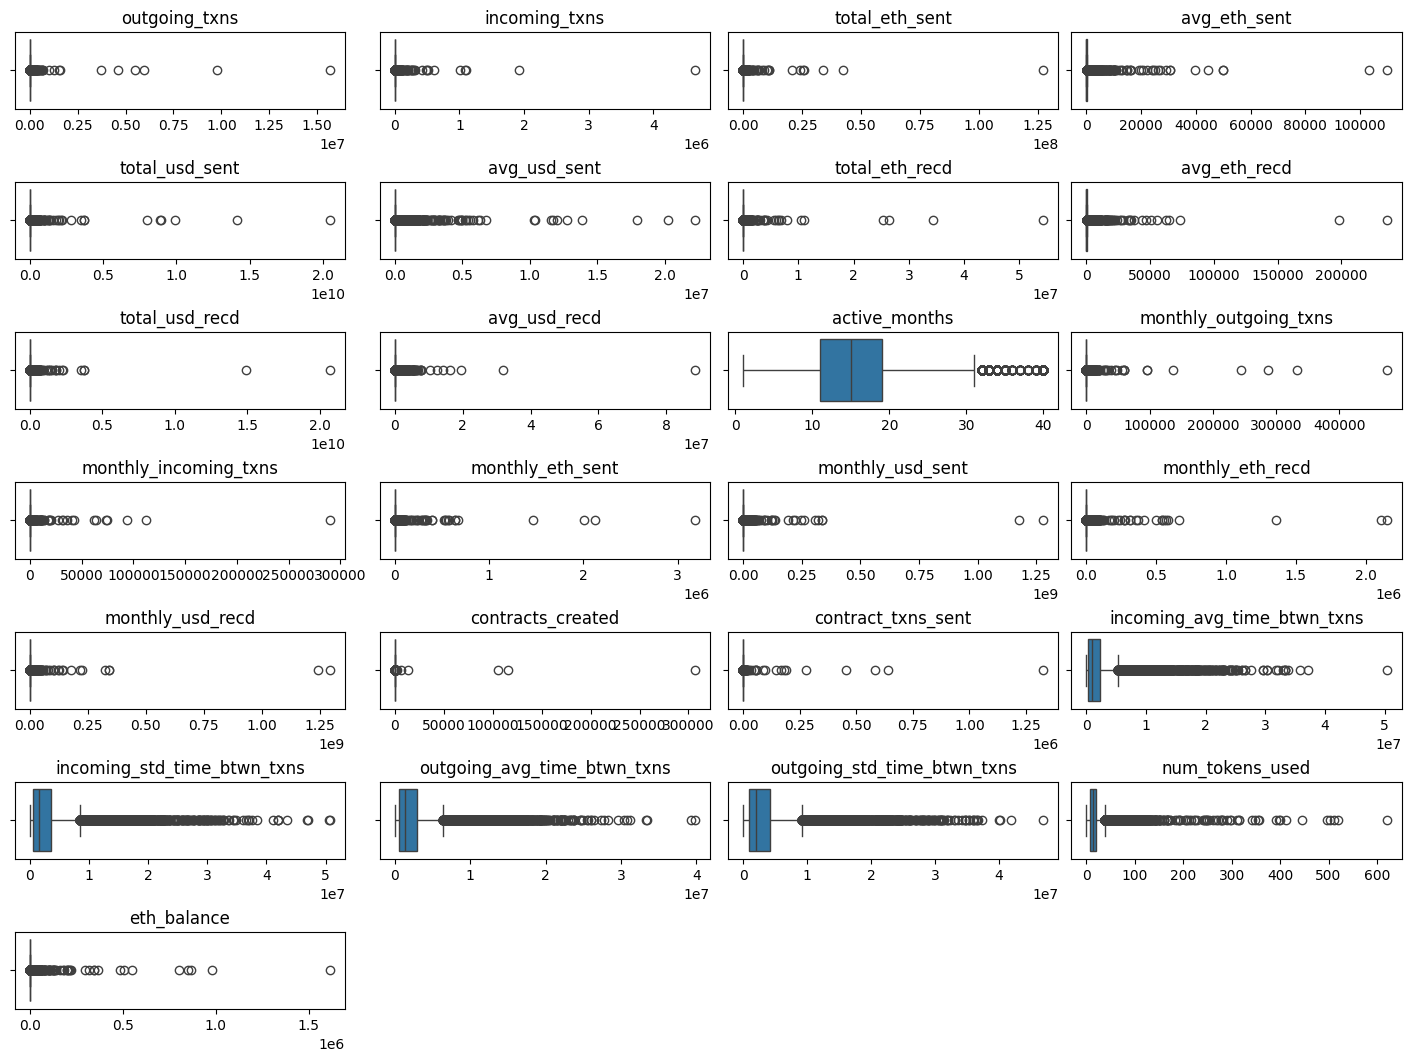

In [19]:
columns = df_labeled.columns[1:-1]

n_columns = 4
n_rows = math.ceil(len(columns) / n_columns)  # Calculate rows dynamically

fig, axes = plt.subplots(n_rows, n_columns, figsize=(14, n_rows * 1.5), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(ax=axes[i], data=df_labeled, x=column)
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Remove x-axis label

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

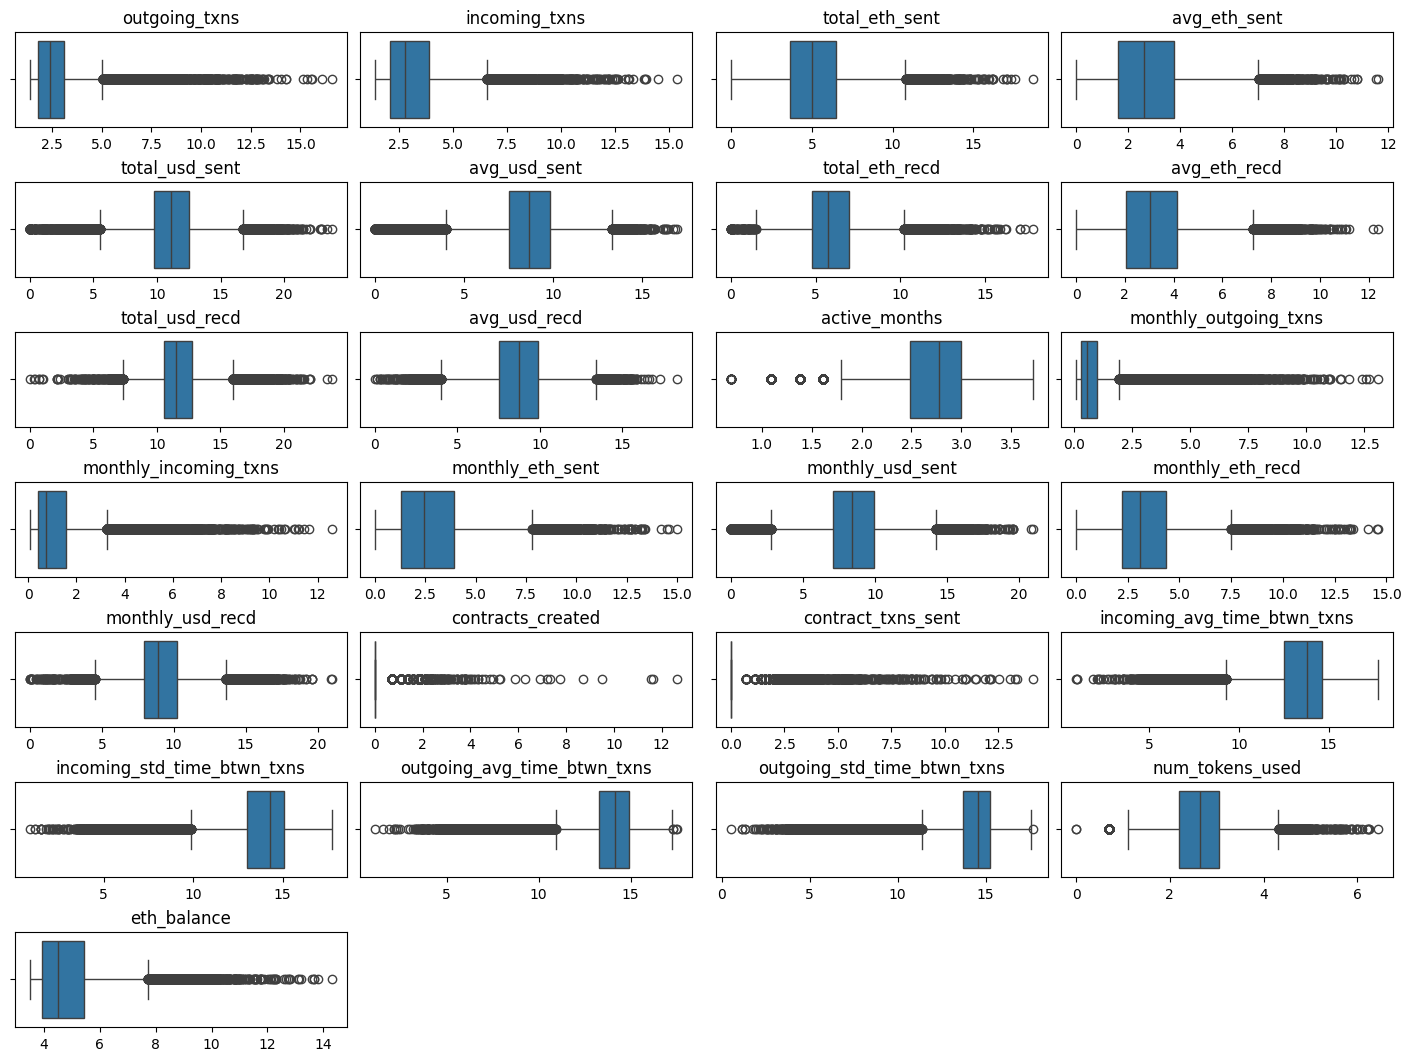

In [20]:
# Plot log transformed distribution of the features

df_log_transformed = df_labeled.copy()
columns = df_labeled.columns[1:-1]

for column in columns:
    df_log_transformed[column] = np.log1p(df_labeled[column])

# Dynamically calculate rows and columns
n_columns = 4
n_rows = math.ceil(len(columns) / n_columns)

fig, axes = plt.subplots(n_rows, n_columns, figsize=(14, n_rows * 1.5), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(ax=axes[i], data=df_log_transformed, x=column)
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Remove x-axis label

# Remove any extra subplots if not needed
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()

<ipython-input-21-b9f37815a1e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_counts.index, y=entity_counts.values, palette='viridis', width=0.4)


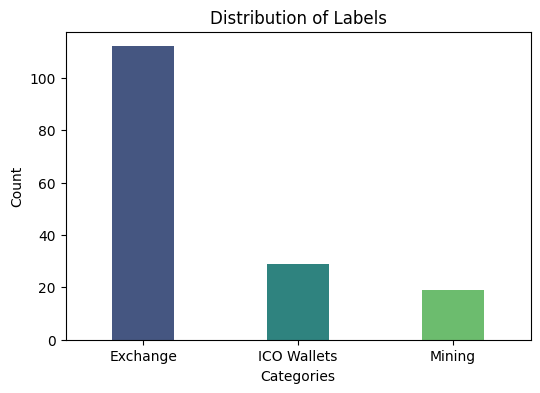

In [21]:
entity_counts = df_labeled['Entity'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=entity_counts.index, y=entity_counts.values, palette='viridis', width=0.4)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Labels')
# plt.xticks(rotation=45)
plt.show()


In [22]:
# df_label_combined.to_csv('/content/drive/MyDrive/ethereum-address-space-clustering/data/labels.csv')
# df_labeled.to_csv('/content/drive/MyDrive/ethereum-address-space-clustering/data/labeled_address_data.csv')